In [145]:
# Importar bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# só funciona no jupyter notebook, os gráficos aparecem logo abaixa da célula
plt.style.use('default')
# usa o estilo padrão do matplotlib
from sklearn.metrics import confusion_matrix
# confusion_matrix -> compara os rótulos verdadeiros com os rótulos previstos

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [146]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_train -> (60000, 28, 28)
# y_train -> (60000,). y_train[index] retorna um dígitio (0 a 9)
# x_test -> (10000, 28, 28)
# y_test -> (10000,)

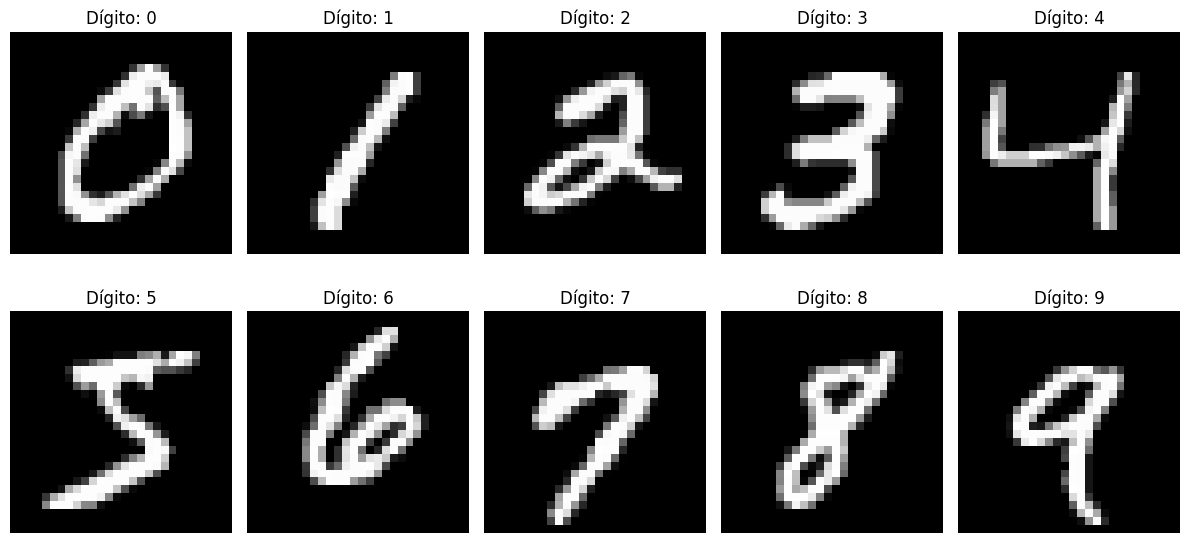

In [147]:
# Lista para armazenar os índices das primeiras ocorrências de cada dígito
indices = []

# Encontrar os índices das primeiras ocorrências dos dígitos de 0 a 9
for digit in range(10):
    idx = np.where(y_train == digit)[0][0]  # Obter o primeiro índice do dígito
    indices.append(idx)
# digit tem os valores de 0,1,2,3,4,5,6,7,8,9
# np.where -> retorna os índices onde uma condição é verdadeira
# y_train -> possui 60.000 elementos e cada elemento é um número inteiro
# o resultado do np.where é um array em que contem os index aonde os valores de y_train é igual ao digit em análise
# com isso, [0][0] acessa essa array (o primeiro [0]) e acessa o primeiro elemento desse array (o segundo [0]), ou seja
# o primeiro index aonde o valor de y_train é igual ao digit em análise
# no final do for, a lista indices vai ter a primeira ocorrência em y_train para os valores 0,1,2,3,4,5,6,7,8,9 
# então, o primeiro elemento de indices é a primeira ocorrência em 0, a segunda é a primeira ocorrência de 1 a assim por diante


# Exibir as 10 imagens correspondentes aos índices encontrados
plt.figure(figsize=(12, 6))
# prepara um espaço para desenhar gráficos
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)  # Layout 2x5 para 10 imagens
    plt.imshow(x_train[idx], cmap="gray")  # Exibir a imagem do dígito
    plt.title(f"Dígito: {y_train[idx]}")  # Corrigir o título para o rótulo correto
    plt.axis("off")  # Remover os eixos
# enumerate -> atribui o índice (i) e o elemento (idx) da lista
# plt.subplot -> usado porque mostra várias imagens juntas na mesma tela, ele cria um espaço para um gráfico (no caso 2 linhas e 5 colunas). i+1 indica   
# a posição do gráfico na grade (precisa fazer + 1 porque os índices da lista começam com 0 e a posição do gráfico na grade começa com 1)
# imshow -> aceita o formato 2D e ele recebe imagens de x_train que é um array 2D (28, 28)
# cada elemento de idx é o índice em y_train referente a uma ocorrência a cada elemento de 0 a 9, então x_train[idx] vai retornar 
# a imagem de 0 a 9
# title -> define o título de cada gráfico e ele recebe o y_train com o idx, que no final vai ser de 0 a 9

plt.tight_layout()
# ajusta automaticamente os espaços entre os subplots para evitar que títulos, eixos ou imagens fiquem sobrepostos, deixando a visualização mais organizada 
# e legível
plt.show()

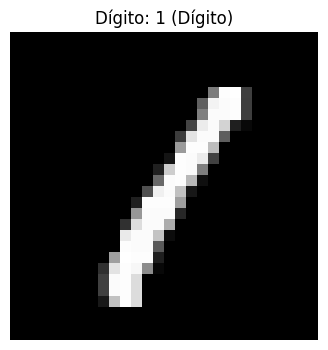

Valores dos pixels do dígito (28x28):
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  124 253 255  63   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96
  244 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 127
  251 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0 

In [148]:
idx_digit = indices[1]
# guarda o índice da primeira ocorrência do dígito 1 
digit_image = x_train[idx_digit]
# a imagem do dígito 1 

# Exibir a imagem do dígito
plt.figure(figsize=(4, 4))
plt.imshow(digit_image, cmap="gray")
# passa a imagem no formato 2D (28, 28)
plt.title(f"Dígito: {y_train[idx_digit]} (Dígito)")
# seria o 1 
plt.axis("off")  
plt.show()

# Imprimir os valores numéricos dos pixels
print("Valores dos pixels do dígito (28x28):")
print(digit_image)
# retorna um array que tem 28 arrays e cada um desses 28 arrays tem 28 elementos, cada elemento representa a intensidade da cor (0 preto e 255 branco) de cada 
# pixel na imagem gerada do dígito 1 

In [149]:
X_train = x_train[0:50000] / 255.0
# x_train tem 60.000 imagens de dígitos e neste caso está pegando 50.000, cada um desses elementos está 28x28 (28 arrays e cada array tem 28 elementos, ou seja, 
# 784 pixels para cada imagem). Nesse formato 28x28 cada pixel tem uma cor que vai de 0 a 255, fazendo /255, deixa a cor de cada pixel de 0 a 1
Y_train = to_categorical(y_train[0:50000], 10)
# one-hot encoded é uma forma de representar as classe (0 a 9) como um vetor binário, cada número seria um array com 10 elementos (porque tem 10 classes) aonde  
# todos os valores são no array são 0 e somente o valor da classe é 1. Isso facilita o aprendizado do modelo
# exemplo: 3 classes (0, 1, 2) -> 2 vira [0, 0, 1]
X_val = x_train[50000:60000] / 255.0 
# pega as últimas 10.000 imagens (imagens de validação, ainda fazem parte das imagens de treinamento) e deixa as cores normalizadas
Y_val = to_categorical(y_train[50000:60000], 10)
# deixa as respostas das 10.000 imagens de validação em one-hot encoded

X_test = x_test / 255.0  # Normalizar os dados de teste
Y_test = to_categorical(y_test, 10)
# deixa as respostas das 10.000 imagens de teste em one-hot encoded

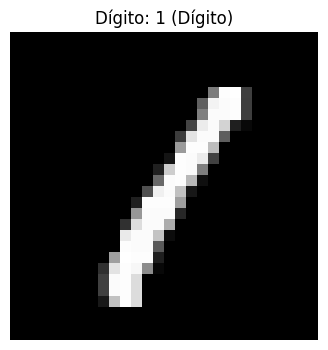

Valores dos pixels do dígito (28x28):
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.    

In [150]:
idx_digit = indices[1]
# indices guarda o índice da resposta da primeira ocorrência do 0 a 9, no caso ele está pegando do dígito 1
digit_image = X_train[idx_digit]
# retorna a imagem com os valores das cores normalizados

# Exibir a imagem do dígito
plt.figure(figsize=(4, 4))
plt.imshow(digit_image, cmap="gray")
# imagem do dígito 1 com as cores normalizadas
plt.title(f"Dígito: {y_train[idx_digit]} (Dígito)")
# define o título, dígito 1
plt.axis("off")  
# Remover os eixos
plt.show()

# Imprimir os valores numéricos dos pixels
print("Valores dos pixels do dígito (28x28):")
print(digit_image)
# mostra as cores da imagem normalizadas

In [151]:
# CNN (Convolutional Neural Network) -> analisar dados com estrutura espacial, como imagens identifica padrões locais (bordas, formas) e ele esepera dados
# no formato 4D (n_imagens, altura, largura, canais). Geralmente, o cnn possui Conv2D, Activation, MaxPooling2D, Flatten e Dense

X_train = np.reshape(X_train, (X_train.shape[0], 28, 28, 1))
# o cnn precisa dos dados em 4D (n_imagens, altura, largura, canais)
# X_train é usado como 1° parâmetro do np.reshape porque precisa indicar qual variável vai ser alterada
# X_train está no formato (50000, 28, 28), ele passou pelo processo de normalização das suas cores e selecionou as primeiras 50000 imagens, quando usamos o 
# reshape, [0] é 50000, [1] é 28 e [2] é 28. Depois disso o X_train fica no formato 4D que o cnn precisa
X_val = np.reshape(X_val, (X_val.shape[0], 28, 28, 1))
# muda para o formato 4D
#X_test = np.reshape(X_test, (X_test.shape[0], 28, 28, 1))
# muda para o formato 4D

X_test = np.reshape(X_test, (X_test.shape[0], 28, 28, 1))

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(50000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)


In [152]:
# Função para embaralhar os pixels da imagem
def shuffel_pixels(idx, data):
    data_new = np.zeros(data.shape)
    for i, img in enumerate(data):
        data_new[i] = img.flatten()[idx].reshape((28, 28, 1))
    return data_new
# np.zeros(data.shape) -> vai copiar o formato do 'data' passado (os elementos em cada array são as colunas e os arrays são as linhas) e preencher 
# tudo com 0 para armazenar as imagens embaralhadas
# o for vai iterar pela quantidade de imagens que tem no 'data', o 'i' sendo o index de cada imagem e o 'img' sendo o array da imagem os exemplos usados
# estão no formato 4D (50000, 28, 28, 1), 
# 'data_new' vai ter a mesma quantidade de elementos que o data porque para cada index de data ele adiciona um novo elemento a cada iteração do for
# img -> inicialmente, cada img tem o formato (28, 28, 1), isso é uma forma mais simplificada de representar 28 arrays com 28 elementos cada array, em que 
# cada um desses elementos (784) é referente a cor de cada pixel da imagem. Esse formato seria uma forma 'computadorizada' de representar a imagem
# 'img.flatten()' -> deixa cada imagem no formato 1D, no caso 784x0 (antes estava 28x28) e cada elemento é a cor de cada pixel da imagem
# idx vai ser usada como um array que vai de 0 a 784 de maneira aleatório, então o 1° elemento de idx pode ser 383 e isso vai selecionar o elemento de index
# 383 no img (1D) e colocar como primeiro elemento em data_new e assim por diante (serve para embaralhar as cores da imagem)
# reshape((28, 28, 1)) -> depois que as cores foram esbaralhadas, o reshape vai ser usado para voltar a imagem no formato 3D

In [153]:
# Função para plotar gráficos de acurácia e loss
def plot_metrics(history, title_suffix=""):
    plt.figure(figsize=(12, 5))
    
    # Plotar acurácia
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Treinamento')
    plt.plot(history.history['val_accuracy'], label='Validação')
    plt.title(f"Acurácia x Épocas {title_suffix}")
    plt.xlabel("Épocas")
    plt.ylabel("Acurácia")
    plt.legend()
    
    # Plotar perda (loss)
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Treinamento')
    plt.plot(history.history['val_loss'], label='Validação')
    plt.title(f"Loss x Épocas {title_suffix}")
    plt.xlabel("Épocas")
    plt.ylabel("Loss")
    plt.legend()
    
    plt.tight_layout()
    plt.show()
# plot_metrics -> recebe o histórico do modelo (history) e cria dois gráficos, um para acurácia e outro para perda
# 'history' usado como exemplo tem o ephoch=10, ou seja, ele vai repetir o treinamento 10 vezes e isso vai ser o eixo x no gráfico 
# history['accuracy'] -> acurácia do modelo nos dados de treinamento por época 
# history['val_accuracy'] -> acurácia do modelo nos dados de validação por época 
# history['loss'] -> função de perda (loss) nos dados de treinamento por época 
# history['val_loss'] -> função de perda (loss) nos dados de validação por época 

In [154]:
# Função para imprimir a matriz de confusão
def print_confusion_matrix(y_true, y_pred, title="Matriz de Confusão"):
    conf_matrix = confusion_matrix(y_true, y_pred)
    print(title)
    print(conf_matrix)
# matriz de confusão -> para cada dígito (0 a 9) o modelo pode prever qualquer um desses dígitos (erradamente ou corretamente), imagine que a resposta
# era 0, a matriz de confusão vai mostrar quantas vezes o modelo preveu 0,1,2,3,4,5,6,7,8 e 9. Ele faz isso para todos os dígitos
# y_true -> o dígito correto
# y_pred -> o dígito que o modelo preveu

In [155]:
np.random.seed(42)
# garante que o embaralhamento será sempre o mesmo
shuffel_idx = np.random.permutation(np.arange(28 * 28))
# np.arange(28*28) -> gera números de 0 a 783 
# .permutation -> embaralha esses números aleatoriamente
# shuffel_idx -> contém um array com os valores de 0 a 783 de forma aleatória

In [156]:
# Embaralhar os dados de treino, validação e teste
X_train_shuffle = shuffel_pixels(shuffel_idx, X_train)
# shuffel_idx -> um array com valores de 0 a 783 de forma aleatória 
# X_train -> (50000, 28, 28, 1)
# X_train_shuffle -> continua no mesmo formato do X_train (50000, 28, 28, 1), só muda a ordem dos pixels
X_val_shuffle = shuffel_pixels(shuffel_idx, X_val)
# shuffel_idx -> um array com valores de 0 a 783 de forma aleatória 
# X_val -> (10000, 28, 28, 1)
# X_val_shuffle -> continua no mesmo formato do X_val (10000, 28, 28, 1), só muda a ordem dos pixels
X_test_shuffle = shuffel_pixels(shuffel_idx, X_test)
# shuffel_idx -> um array com valores de 0 a 783 de forma aleatória 
# X_test -> (10000, 28, 28, 1)
# X_test_shuffle -> continua no mesmo formato do X_test (10000, 28, 28, 1), só muda a ordem dos pixels

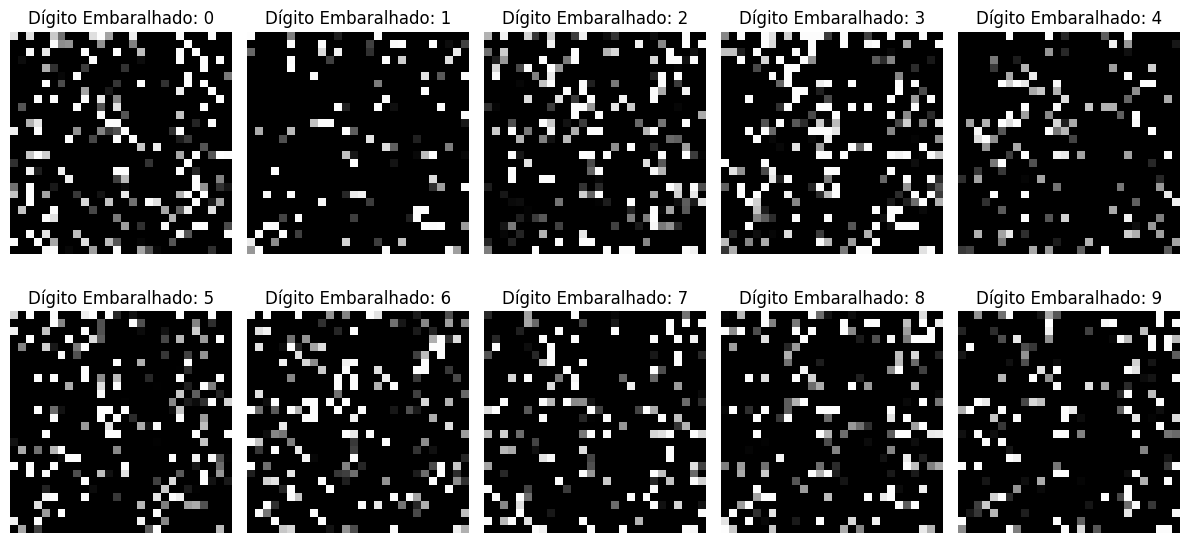

In [157]:
indices = []

for digit in range(10):
    idx = np.where(y_train == digit)[0][0]
    indices.append(idx)
# digit tem os valores de 0,1,2,3,4,5,6,7,8,9
# np.where -> retorna os índices onde uma condição é verdadeira
# y_train -> possui 60.000 elementos e cada elemento é um número inteiro
# o resultado do np.where é um array em que contem os index aonde os valores de y_train é igual ao digit em análise
# com isso, [0][0] acessa essa array (o primeiro [0]) e acessa o primeiro elemento desse array (o segundo [0]), ou seja
# o primeiro index aonde o valor de y_train é igual ao digit em análise
# no final do for, a lista indices vai ter a primeira ocorrência em y_train para os valores 0,1,2,3,4,5,6,7,8,9 
# então, o primeiro elemento de indices é a primeira ocorrência em 0, a segunda é a primeira ocorrência de 1 a assim por diante

# Exibir as 10 imagens embaralhadas correspondentes aos índices encontrados
plt.figure(figsize=(12, 6))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)  # Layout 2x5 para 10 imagens
    plt.imshow(X_train_shuffle[idx].reshape(28, 28), cmap="gray")  # Mostrar a imagem embaralhada
    plt.title(f"Dígito Embaralhado: {y_train[idx]}")  # Título com o rótulo original
    plt.axis("off")
# enumerate -> atribui o índice (i) e o elemento (idx) da lista
# plt.subplot -> usado porque mostra várias imagens juntas na mesma tela, ele cria um espaço para um gráfico (no caso 2 linhas e 5 colunas). i+1 indica   
# a posição do gráfico na grade (precisa fazer + 1 porque os índices da lista começam com 0 e a posição do gráfico na grade começa com 1)
# imshow -> aceita o formato 2D e ele recebe imagens de x_train que é um array 2D (28, 28)
# cada elemento de idx é o índice em y_train referente a uma ocorrência a cada elemento de 0 a 9, então x_train[idx] vai retornar 
# a imagem de 0 a 9
# title -> define o título de cada gráfico e ele recebe o y_train com o idx, que no final vai ser de 0 a 9

plt.tight_layout()  # Ajustar o layout para evitar sobreposição
plt.show()

In [158]:
# Ajustar os dados para o formato vetorial necessário para as fcNNs (camada oculta)
# fcNN (Fully Connected Neural Network) -> cada neurônio de uma camada está conectado a todos os neurônios da próxima camada, usando a camada Dense
# e espera dados no formato 2D (n_imagens, n_features), n_features é o números de pixels para cada imagem (784)
# deram o nome de flat, porque os dados foram achatados 
X_train_flat = X_train.reshape([X_train.shape[0], 784])
# X_train -> (50000, 28, 28, 1)
# X_train.shape[0] -> 50000
# no final X_train_flat fica (50000, 784)
X_val_flat = X_val.reshape([X_val.shape[0], 784])
# X_val -> (10000, 28, 28, 1)
# X_val.shape[0] -> 10000
# no final X_val_flat fica (10000, 784)
X_test_flat = X_test.reshape([X_test.shape[0], 784])
# X_test -> (10000, 28, 28, 1)
# [X_test.shape[0] -> 10000
# no final X_test_flat -> (10000, 784)

In [159]:
# Ajustar os dados embaralhados para o formato vetorial
X_train_shuffle_flat = X_train_shuffle.reshape([X_train_shuffle.shape[0], 784])
# X_train_shuffle -> (50000, 28, 28, 1)
# X_train_shuffle_flat -> fica no formato (50000, 784)
X_val_shuffle_flat = X_val_shuffle.reshape([X_val_shuffle.shape[0], 784])
# X_val_shuffle -> (10000, 28, 28, 1)
# X_val_shuffle_flat -> fica no formato (10000, 784)
X_test_shuffle_flat = X_test_shuffle.reshape([X_test_shuffle.shape[0], 784])
# X_test_shuffle -> (10000, 28, 28, 1)
# X_test_shuffle_flat -> fica no formato (10000, 784)

In [160]:
# Definir uma rede neural totalmente conectada do tipo fcNN (porque todas as camadas são do tipo Dense, que são totalmente conectados) com 2 camadas ocultas
model = Sequential()
# camada de entrada seria o input de 784 
# camada oculta: 
model.add(Dense(100, input_shape=(784,)))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
# camada de saída:
model.add(Dense(10))
model.add(Activation('softmax'))
# sequential() -> criar redes neurais onde as camadas são adicionadas em sequência, uma após a outra, em ordem
# e o dado passa por todas essas camadas até chegar na saída
# Dense -> adiciona uma camada com 100 neurônios e espera uma entrada de 748 valores, com isso cada neurônio vai 
# se conectar aos 748 valores, formando 74800 conexões 
# Activation('sigmoid') -> adiciona uma  função de ativação sigmoid na camada anterior, deixa as saídas de 0 a 1 
# Dense (50) -> adiciona mais uma cadama com 50 neurônios
# Activation('sigmoid') -> adiciona uma  função de ativação sigmoid na camada anterior
# Dense (10) -> adiciona uma camada com 10 neurônios 
# É comum ter várias camadas densas para aumentar a capacidade de aprendizado da rede, 
# camadas com menos neurônios fazem o modelo destacam melhores padrões essenciais, resumir a informação importante, 
# descartando ruído ou detalhes irrelevantes
# Activation('softmax') -> Aplica a função softmax na saída da última camada, define uma probabilidade de ser cada 
# classe (todas os valores que o modelo pode prever) 

c:\Users\Nicolas\Downloads\tensorflow\.env\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [161]:
# Define como a rede neural (fcNN) criada anteriormente vai aprender e ser avaliada durante o treinamento 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# compile → define como o modelo vai aprender e avaliar durante treino e validação (não treina ainda)
# loss='categorical_crossentropy' → mede o erro para ajustar pesos em problemas de classificação
# optimizer='adam' -> atualiza pesos e vieses usando o erro do loss para melhorar as previsões
# metrics=['accuracy'] → mede a acurácia, ou seja, a % de previsões corretas.

In [162]:
# Treinar a fcNN criado, passa os exemplos para ele aprender da forma que foi definida antes
history = model.fit(X_train_flat, Y_train, 
                    batch_size=128, 
                    epochs=10,
                    verbose=2, 
                    validation_data=(X_val_flat, Y_val))
# history -> guarda o histórico do treinamento (valores de loss e accuracy), serve para analisar o desempenho do modelo
# fit -> treina o modelo com os dados de entrada
# X_train_flat -> (50000, 784)
# Y_train -> respostas de treino em one-hot encoded(cada resposta vira um array em que todas as possibilidades de resposta, no caso
# de 0 a 9 como 0 e somente a resposta da imagem como 1)
# batch_size=128 -> ao invés de passar todos os dados de uma vez para o modelo, ele vai processar 128 exemplos por vez (treinar de forma mais eficiente)
# epochs=10 -> o modelo vai repetir 10 vezes 
# verbose -> controla o nível de detalhes exibidos durante o treinamento do modelo, verbose=2 mostra uma linha de saída por época, sem barra de progresso
# validation_data -> avalia o desempenho do modelo usando outros dados de exemplo (dados de validação), isso porque o modelo pode estar decorando os dados de treino
# X_val_flat -> (10000, 784)
# Y_val -> respostas de validação em one-hot encoded 

Epoch 1/10
391/391 - 2s - 6ms/step - accuracy: 0.7902 - loss: 0.9915 - val_accuracy: 0.9065 - val_loss: 0.3914
Epoch 2/10
391/391 - 1s - 2ms/step - accuracy: 0.9137 - loss: 0.3297 - val_accuracy: 0.9320 - val_loss: 0.2470
Epoch 3/10
391/391 - 1s - 2ms/step - accuracy: 0.9329 - loss: 0.2388 - val_accuracy: 0.9447 - val_loss: 0.1989
Epoch 4/10
391/391 - 1s - 2ms/step - accuracy: 0.9443 - loss: 0.1930 - val_accuracy: 0.9534 - val_loss: 0.1683
Epoch 5/10
391/391 - 1s - 2ms/step - accuracy: 0.9535 - loss: 0.1614 - val_accuracy: 0.9587 - val_loss: 0.1479
Epoch 6/10
391/391 - 1s - 2ms/step - accuracy: 0.9604 - loss: 0.1382 - val_accuracy: 0.9627 - val_loss: 0.1343
Epoch 7/10
391/391 - 1s - 3ms/step - accuracy: 0.9662 - loss: 0.1188 - val_accuracy: 0.9641 - val_loss: 0.1206
Epoch 8/10
391/391 - 1s - 2ms/step - accuracy: 0.9705 - loss: 0.1039 - val_accuracy: 0.9679 - val_loss: 0.1081
Epoch 9/10
391/391 - 1s - 3ms/step - accuracy: 0.9742 - loss: 0.0908 - val_accuracy: 0.9697 - val_loss: 0.1036
E

Estrutura da Matriz de Confusão
Linhas: Representam as classes reais (rótulos verdadeiros) dos dígitos.
Colunas: Representam as classes preditas (saídas do modelo).

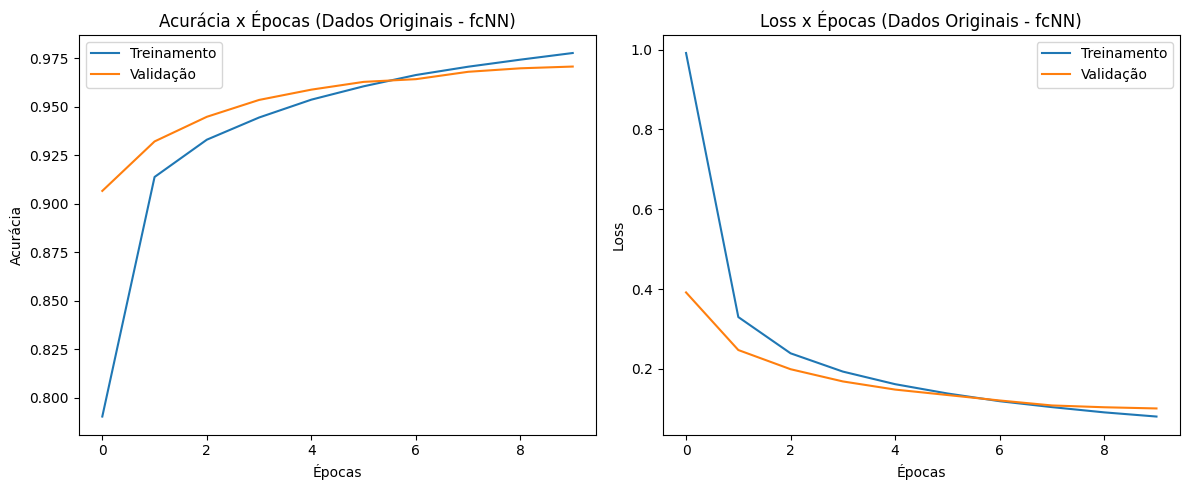

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Matriz de Confusão - fcNN (Dados Originais)
[[ 971    0    2    1    0    2    2    1    1    0]
 [   0 1125    2    1    0    1    4    1    1    0]
 [   8    3  995    7    3    0    4    8    4    0]
 [   0    0    3  987    0    3    0    9    4    4]
 [   1    0    5    0  944    0    2    4    1   25]
 [   5    1    0   17    2  853    6    1    4    3]
 [   8    3    1    1    4   11  924    1    5    0]
 [   2    4    6    4    0    0    0 1005    0    7]
 [   5    3    3   13    2    6    6    8  925    3]
 [   4    5    0   10    6    3    0    8    0  973]]


In [163]:
# Plotar métricas e imprimir matriz de confusão (dados originais)
plot_metrics(history, title_suffix="(Dados Originais - fcNN)")
# na 1° época, o modelo erra quase todos para depois acertar quase todos os dígitos, isso porque ele vai ajustando os pesos (importância de cada entrada)
# e aprendendo os padrões do mnist que são consideráveis fáceis
pred = model.predict(X_test_flat)
# X_test_flat -> (10000, 784)
# predict -> um array que contem um array para cada imagem passada (10000 no caso) em que mostra a probabilidade de cada classe (0 a 9) para cada imagem
# e o 784 (número de pixels por imagem) é usado para calcular a probabilidade de cada classe
# array de uma imagem -> [0.01, 0.02, 0.05, 0.90, 0.01, 0.00, 0.00, 0.00, 0.01, 0.00]
y_pred = np.argmax(pred, axis=1)
# y_pred -> retorna o índice do maior valor de cada array, sendo também a resposta (dígito) que o modelo preveu para cada imagem de X_test_flat  
y_true = np.argmax(Y_test, axis=1)
# Y_test -> as respostas das 10.000 imagens de teste estão em one-hot encoded
# y_true -> como as respostas vão de 0 a 9, o argmax vai retornar o índice do maior valor do array (1) e ao mesmo tempo a resposta correta, porque
# o 1 vai estar no indice da resposta correta
print_confusion_matrix(y_true, y_pred, title="Matriz de Confusão - fcNN (Dados Originais)")
# confusion_matrix -> cada linha é a resposta (y) e cada coluna é a previsão do modelo (y_previsto), ele mostra para cada resposta (y) quantas vezes
# o modelo preveu cada dígito (y_previsto), se os maiores números estão na diagonal, significa que o modelo acertou a maioria das previsões

In [164]:
# Avaliar o modelo nos dados de teste originais
pred = model.predict(X_test_flat)
# pred tem o seguinte array para cada imagem que a probabilidade dele prever cada dígito com a imagem passada
# [0.01, 0.02, 0.05, 0.90, 0.01, 0.00, 0.00, 0.00, 0.01, 0.00]
acc_fc_orig = np.sum(np.argmax(Y_test, axis=1) == np.argmax(pred, axis=1)) / len(pred)
# np.argmax(Y_test, axis=1) -> retorna as respostas corretas (dígitos) 
# np.argmax(pred, axis=1) -> as repostas previstas pelo modelo
# np.sum -> soma os valores que são iguais (os que o modelo acertou) e divide pelo total de previsões (len(pred))
# isso calcula a acurácia do modelo
print("Acurácia com dados originais (fcNN):", acc_fc_orig)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Acurácia com dados originais (fcNN): 0.9702


In [ ]:
# Definir uma rede neural totalmente conectada (fcNN) com 2 camadas ocultas
model = Sequential()
model.add(Dense(100, input_shape=(784,)))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))
# faz a mesma rede neural que a anterior, mas agora com os dados embaralhados

c:\Users\Nicolas\Downloads\tensorflow\.env\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compilar o modelo
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# compila o modelo da mesma forma que a anterior, mas agora com os dados embaralhados

In [ ]:
history = model.fit(X_train_shuffle_flat, Y_train, 
                    batch_size=128, 
                    epochs=10,
                    verbose=2, 
                    validation_data=(X_val_shuffle_flat, Y_val))
# X_train_shuffle_flat -> são as imagens de treino (50000) que os seus pixels foram embaralhados e ela fica no formato (50000, 784)
# Y_train -> as respostas no formato one-hot encoded, [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] (dígito 5)
# X_val_shuffle_flat -> as imagens de validação (10000) com os pixels embaralhados e no formato (10000, 784)
# respostas de validação em one-hot encoded 

Epoch 1/10
391/391 - 3s - 8ms/step - accuracy: 0.7860 - loss: 0.9729 - val_accuracy: 0.9088 - val_loss: 0.3861
Epoch 2/10
391/391 - 1s - 3ms/step - accuracy: 0.9130 - loss: 0.3319 - val_accuracy: 0.9311 - val_loss: 0.2521
Epoch 3/10
391/391 - 1s - 3ms/step - accuracy: 0.9309 - loss: 0.2435 - val_accuracy: 0.9424 - val_loss: 0.2069
Epoch 4/10
391/391 - 1s - 3ms/step - accuracy: 0.9438 - loss: 0.1976 - val_accuracy: 0.9514 - val_loss: 0.1753
Epoch 5/10
391/391 - 1s - 3ms/step - accuracy: 0.9526 - loss: 0.1659 - val_accuracy: 0.9584 - val_loss: 0.1537
Epoch 6/10
391/391 - 2s - 4ms/step - accuracy: 0.9587 - loss: 0.1421 - val_accuracy: 0.9605 - val_loss: 0.1370
Epoch 7/10
391/391 - 1s - 3ms/step - accuracy: 0.9647 - loss: 0.1234 - val_accuracy: 0.9651 - val_loss: 0.1219
Epoch 8/10
391/391 - 1s - 3ms/step - accuracy: 0.9696 - loss: 0.1074 - val_accuracy: 0.9670 - val_loss: 0.1143
Epoch 9/10
391/391 - 1s - 3ms/step - accuracy: 0.9731 - loss: 0.0940 - val_accuracy: 0.9689 - val_loss: 0.1072
E

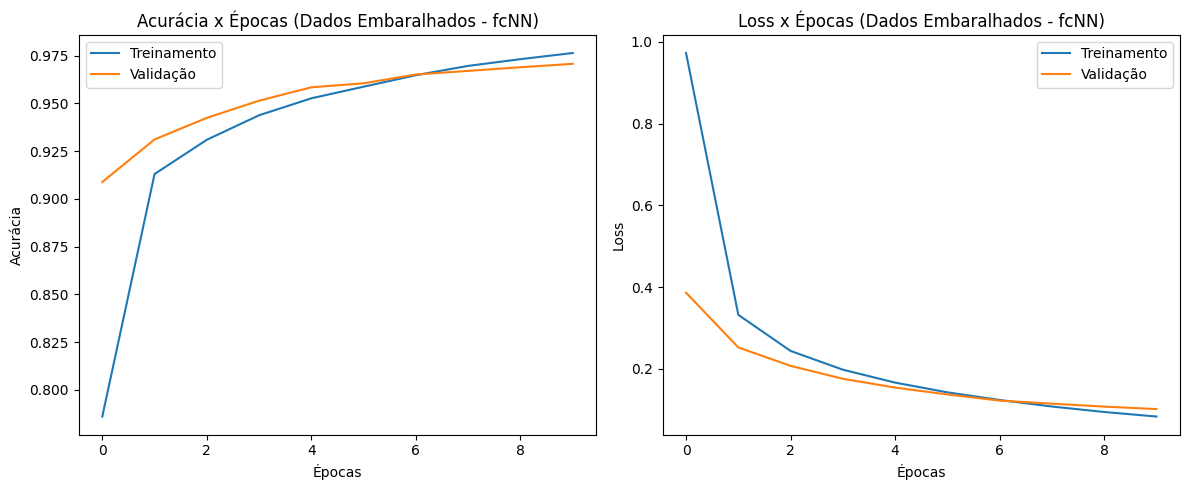

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Matriz de Confusão - fcNN (Dados Embaralhados)
[[ 964    0    2    1    0    2    9    1    1    0]
 [   0 1120    3    0    0    1    4    2    5    0]
 [   5    1 1001    4    3    1    3    7    7    0]
 [   0    1    6  982    0    3    0    9    8    1]
 [   1    0    4    1  953    0    8    2    2   11]
 [   5    1    1   17    1  842    7    2   12    4]
 [   6    2    3    1    2    4  935    0    5    0]
 [   1    6   11    6    1    0    0  997    0    6]
 [   5    1    6   10    3    4    4    3  936    2]
 [   4    5    0   10   13    1    1    9    4  962]]


In [168]:
# Plotar métricas e imprimir matriz de confusão (dados embaralhados)
plot_metrics(history, title_suffix="(Dados Embaralhados - fcNN)")
pred = model.predict(X_test_shuffle_flat)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(Y_test, axis=1)
print_confusion_matrix(y_true, y_pred, title="Matriz de Confusão - fcNN (Dados Embaralhados)")

In [169]:
# Avaliar o modelo nos dados de teste embaralhados
pred = model.predict(X_test_shuffle_flat)
acc_fc_shuffle = np.sum(np.argmax(Y_test, axis=1) == np.argmax(pred, axis=1)) / len(pred)
print("Acurácia com dados embaralhados (fcNN):", acc_fc_shuffle)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step
Acurácia com dados embaralhados (fcNN): 0.9692


In [ ]:
# Definir uma CNN para trabalhar com dados organizados espacialmente
# Sequential() -> criar redes neurais
# usar o model.add e o layers. é a mesma coisa, só como importa e chama a função
model = Sequential()
model.add(Convolution2D(8, (3, 3), padding='same', input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(Convolution2D(8, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(16, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Convolution2D(16, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(40))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

# camada de entrada:
    # Conv2D (Convolucional 2D) -> processamento de imagens, onde a rede neural aprende a identificar padrões (números) nas imagens
    # 8 -> número de filtros que a camada vai aprender (32 padrões por imagem, como linha, borda, curva)
    # (3, 3) -> tamanho do filtro que percorre toda a imagem para extrair padrões, 3 pixels de altura e 3 de largura
    # padding='same' -> a saída da convolução tem o mesmo tamanho da entrada original (não é o padrão)
    # input_shape -> indica o formato da entrada, no caso (28, 28, 1) que é a imagem de entrada (altura, largura e canais)
# camada oculta:
    # Activation('relu') -> aplicação a função de aplicação 'relu' na camada anterior
    # Convolution2D -> faz ele de novo para aumentar a capacidade de extração de padrões mais complexos
    # Activation('relu') -> aplicação a função de aplicação 'relu' na camada anterior
    # MaxPooling2D() -> pegando apenas os valores mais altos dentro de pequenas regiões
    # pool_size=(2, 2) -> vai olhar blocos de 2x2 pixels e pegar apenas o maior valor de cada bloco
    # Refaz o processo porém com o Convolution2D com o número de filtros com 16 para deixar a imagem menor 
    # e as próximas camadas conseguem capturar padrões mais complexos 
    # Flatten() -> preparam a entrada para 1D porque é o formato que o Dense espera
    # Dense(40) -> camada com 40 neurônios e começa a tomar decisões com base nos padrões extraídos pelas camadas convolucionais
    # Activation('relu') -> aplicação a função de aplicação 'relu' na camada anterior
# camada de saída:
    # Dense (10) -> saída com 10 neurônios porque são 10 classes (0 a 9)
    # Activation('softmax') -> converte as saídas em probabilidades que somam 1

c:\Users\Nicolas\Downloads\tensorflow\.env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [178]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# Treinar a CNN nos dados originais
history = model.fit(X_train, Y_train, 
                    batch_size=128, 
                    epochs=10,
                    verbose=2, 
                    validation_data=(X_val, Y_val))

# X_train -> (50000, 28, 28, 1)
# Y_train -> respostas de treino em one-hot encoded
# X_val -> (10000, 28, 28, 1)
# Y_val -> respostas de validação em one-hot encoded 

Epoch 1/10
391/391 - 6s - 15ms/step - accuracy: 0.8859 - loss: 0.3728 - val_accuracy: 0.9620 - val_loss: 0.1208
Epoch 2/10
391/391 - 4s - 9ms/step - accuracy: 0.9709 - loss: 0.0955 - val_accuracy: 0.9773 - val_loss: 0.0745
Epoch 3/10
391/391 - 4s - 9ms/step - accuracy: 0.9792 - loss: 0.0672 - val_accuracy: 0.9787 - val_loss: 0.0696
Epoch 4/10
391/391 - 4s - 9ms/step - accuracy: 0.9833 - loss: 0.0535 - val_accuracy: 0.9836 - val_loss: 0.0572
Epoch 5/10
391/391 - 4s - 9ms/step - accuracy: 0.9863 - loss: 0.0429 - val_accuracy: 0.9858 - val_loss: 0.0495
Epoch 6/10
391/391 - 4s - 9ms/step - accuracy: 0.9880 - loss: 0.0365 - val_accuracy: 0.9842 - val_loss: 0.0565
Epoch 7/10
391/391 - 4s - 9ms/step - accuracy: 0.9898 - loss: 0.0317 - val_accuracy: 0.9846 - val_loss: 0.0561
Epoch 8/10
391/391 - 4s - 9ms/step - accuracy: 0.9912 - loss: 0.0270 - val_accuracy: 0.9868 - val_loss: 0.0473
Epoch 9/10
391/391 - 4s - 10ms/step - accuracy: 0.9923 - loss: 0.0237 - val_accuracy: 0.9855 - val_loss: 0.0502

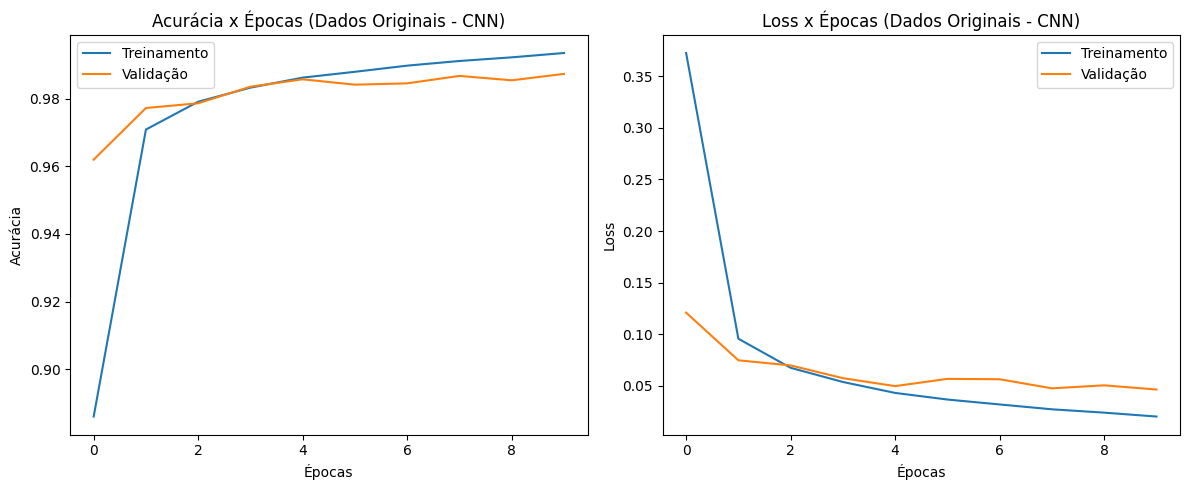

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusão - CNN (Dados Originais)
[[ 976    1    1    0    0    0    1    1    0    0]
 [   0 1132    1    0    0    0    1    1    0    0]
 [   2    2 1021    0    2    0    0    5    0    0]
 [   0    0    7  991    0    5    0    2    3    2]
 [   0    1    0    0  976    0    0    0    0    5]
 [   2    0    0    5    0  880    2    0    1    2]
 [   5    2    1    0    3    1  945    0    1    0]
 [   0    1    3    0    0    1    0 1020    1    2]
 [   2    1    3    1    1    1    0    1  961    3]
 [   3    2    1    0    4    4    0    2    1  992]]


In [173]:
# Plotar métricas e imprimir matriz de confusão (dados originais)
plot_metrics(history, title_suffix="(Dados Originais - CNN)")
pred = model.predict(X_test)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(Y_test, axis=1)
print_confusion_matrix(y_true, y_pred, title="Matriz de Confusão - CNN (Dados Originais)")

In [174]:
# Avaliar a CNN nos dados originais
pred = model.predict(X_test)
acc_cnn = np.sum(np.argmax(Y_test, axis=1) == np.argmax(pred, axis=1)) / len(pred)
print("Acurácia com CNN (dados originais):", acc_cnn)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Acurácia com CNN (dados originais): 0.9894


In [175]:
# Treinar a CNN nos dados embaralhados
history = model.fit(X_train_shuffle, Y_train, 
                    batch_size=128, 
                    epochs=10,
                    verbose=2, 
                    validation_data=(X_val_shuffle, Y_val))

Epoch 1/10
391/391 - 4s - 10ms/step - accuracy: 0.8264 - loss: 0.5570 - val_accuracy: 0.9024 - val_loss: 0.3073
Epoch 2/10
391/391 - 4s - 10ms/step - accuracy: 0.9176 - loss: 0.2675 - val_accuracy: 0.9318 - val_loss: 0.2298
Epoch 3/10
391/391 - 4s - 9ms/step - accuracy: 0.9348 - loss: 0.2118 - val_accuracy: 0.9410 - val_loss: 0.2021
Epoch 4/10
391/391 - 4s - 10ms/step - accuracy: 0.9455 - loss: 0.1791 - val_accuracy: 0.9449 - val_loss: 0.1842
Epoch 5/10
391/391 - 4s - 9ms/step - accuracy: 0.9528 - loss: 0.1517 - val_accuracy: 0.9459 - val_loss: 0.1849
Epoch 6/10
391/391 - 4s - 9ms/step - accuracy: 0.9571 - loss: 0.1359 - val_accuracy: 0.9477 - val_loss: 0.1712
Epoch 7/10
391/391 - 4s - 9ms/step - accuracy: 0.9621 - loss: 0.1197 - val_accuracy: 0.9533 - val_loss: 0.1627
Epoch 8/10
391/391 - 3s - 9ms/step - accuracy: 0.9658 - loss: 0.1076 - val_accuracy: 0.9496 - val_loss: 0.1649
Epoch 9/10
391/391 - 3s - 8ms/step - accuracy: 0.9692 - loss: 0.0981 - val_accuracy: 0.9498 - val_loss: 0.172

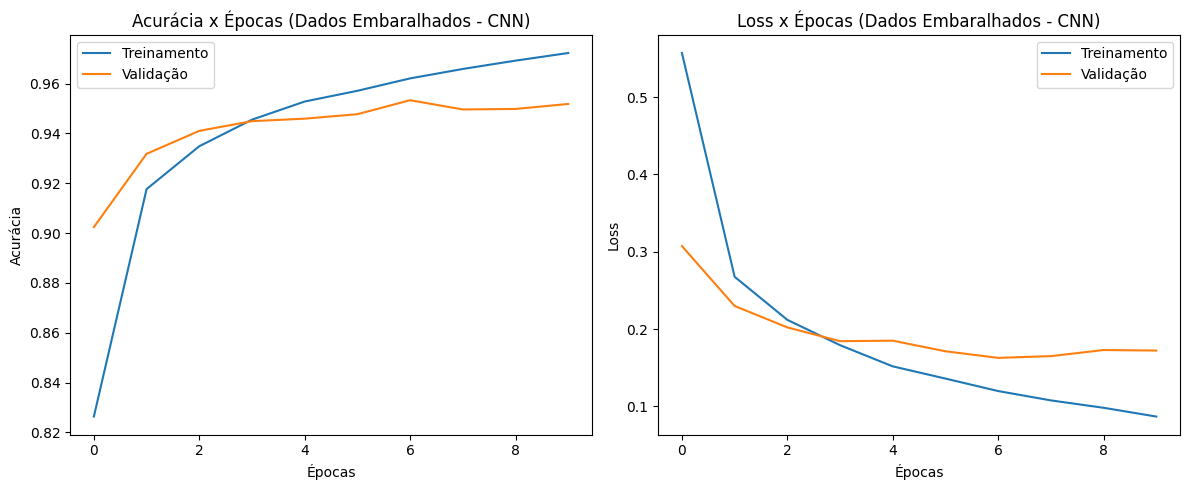

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusão - CNN (Dados Embaralhados)
[[ 954    0    9    1    0    0   10    0    3    3]
 [   0 1119    1    2    1    0    2    4    6    0]
 [   6    5  974   16    1    0    7   13   10    0]
 [   0    0    6  982    0    6    1    4    7    4]
 [   2    1    2    1  941    1   10    6    2   16]
 [   9    1    4   44    3  797   16    4    9    5]
 [   7    2    3    0    5    5  930    2    4    0]
 [   1    6   11    7    6    0    1  987    1    8]
 [   4    0    7   23    6    9    7    6  907    5]
 [   5    4    1    8   25   10    2   24   13  917]]


In [176]:
# Plotar métricas e imprimir matriz de confusão (dados embaralhados)
plot_metrics(history, title_suffix="(Dados Embaralhados - CNN)")
pred = model.predict(X_test_shuffle)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(Y_test, axis=1)
print_confusion_matrix(y_true, y_pred, title="Matriz de Confusão - CNN (Dados Embaralhados)")

In [177]:
# Avaliar a CNN nos dados embaralhados
pred = model.predict(X_test_shuffle)
acc_cnn_shuffle = np.sum(np.argmax(Y_test, axis=1) == np.argmax(pred, axis=1)) / len(pred)
print("Acurácia com CNN (dados embaralhados):", acc_cnn_shuffle)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Acurácia com CNN (dados embaralhados): 0.9508
